# Assignment 4: Optimizing Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In this assignment, you will continue practicing the fourth step of the machine learning life cycle and train logistic regression models that will be used to solve a classification problem.  You will build many variants, each one with a different value of the $C$ hyperparameter, which governs the amount of regularization used. Regularization is a process where we add a "penalty" to the original log loss function. This penalty is a function of the magnitudes of the weights learned in the Logistic Regression. The following shows the regularized log loss using what is called "L2" regularization.<br><br> 

<center>$Regularized \ LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N (y_ilog(P_i)+(1-y_i)log(1-P_i))+\frac{1}{C} \sum\limits_{j=1}^m w_j^2$</center><br><br>


With L2 regularization, the penalty is the sum of the squares of the weights scaled by a constant $1/C$. When the hyperparameter $C$ is large, we reduce the weight of the penalty, which results in less regularization. You will build Logistic regressions with different values of $C$ and will check how this impacts the log loss.


You will complete the following tasks:

1. Build your DataFrame and define your ML problem:
    * Load the "cell2cell" data set into a DataFrame
    * Define the label - what are you predicting?
    * Identify features
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train logistic regression classifiers and evaluate their performances:
    * Fit logistic regression models to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of each model's predictions
    * Plot and analyize the resulting log loss and accuracy scores

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [2]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [3]:
df = pd.read_csv(filename)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

To implement a Logistic Regression model, we must use only the numeric columns. 


<b>Task</b>: Use the Pandas DataFrame <code>select_dtypes()</code> method to obtain all of names of columns that have a dtype of "float64." Save the result to a list named `feature_list`. 

In [5]:
feature_list = df.select_dtypes(include='float64').columns.tolist()

## Part 2. Create Labeled Examples from the Data Set 

Our data is fully prepared for modeling. We can now create labeled examples from DataFrame `df`.

<b>Task</b>: Obtain the feature columns from DataFrame `df` and assign to `X`. Obtain the label column from DataFrame `df` and assign to `y`.

You should have 51047 labeled examples. Each example contains 35 features and one label.

In [6]:
# Create feature and label sets
X = df[feature_list]
y = df["Churn"]


## Part 3. Create Training and Test Data Sets

<b>Task</b>: Create training and test data sets out of the labeled examples. Save the results to variables `X_train, X_test, y_train, y_test`.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<b>Task</b>: Check the dimensions of the training and test data sets.

In [8]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (34201, 35)
X_test: (16846, 35)
y_train: (34201,)
y_test: (16846,)


## Part 4. Train a Logistic Regression Classifier and Evaluate the Model

The code cell below contains a function definition `train_test_LR()`. 

Inspect the function definition `train_test_LR(X_train, X_test, y_train, y_test, c=1)`. The function expects the training and test data sets, as well as a value for hyperparameter $C$. Note that we supplied the value of 1 for $C$ by default.

<b>Task:</b> Complete the function to make it work.

This function should:
1. train a Logistic Regression model on the training data
2. test the resulting model on the test data
3. compute and return two items:
    * the log loss of the resulting probability predictions on the test data 
    * the accuracy score of the resulting predicted class labels on the test data


You will use the scikit-learn [```LogisticRegression``` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and will provide the arguments `C=c` when creating the model object.




In [9]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Logistic Regression classifier and return log loss and accuracy.
    '''
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    
    prob_preds = model.predict_proba(X_test)
    logloss = log_loss(y_test, prob_preds)
    
    class_preds = model.predict(X_test)
    acc = accuracy_score(y_test, class_preds)
    
    return logloss, acc

### Train a Model and Analyze the Results

<b>Task:</b> Use your function `train_test_LR()` to train one Logistic Regression classifier with the default value of hyperparameter C (`c=1`). Print the resulting log loss and accuracy score.

In [10]:
logloss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print("Log Loss:", logloss)
print("Accuracy:", acc)


Log Loss: 0.584423042977864
Accuracy: 0.7118010210138905


## Part 5. Train on Different Hyperparameter Values and Analyze the Results

Now we will adjust the $C$ regularization hyperparameter to check its impact on the model's log loss and accuracy. Hyperparameter `C` stands for the inverse of regularization strength. Smaller values specify stronger regularization and a simpler model. Larger values specify weaker regularization and a more complex model.<br>

The code cell below creates a list `cs` of twenty values of $C$.  Every item in the list has a value $10^i$ for every integer $i$ in the output of `range(-10,10)`. Run the code cell below and inspect the different values of $C$.

In [11]:
cs = [10**i for i in range(-10, 10)]

log_losses = []
accuracies = []

for c in cs:
    loss, acc = train_test_LR(X_train, y_train, X_test, y_test, c=c)
    log_losses.append(loss)
    accuracies.append(acc)
    print(f"C={c:.1e} --> Log Loss: {loss:.4f}, Accuracy: {acc:.4f}")


C=1.0e-10 --> Log Loss: 0.6003, Accuracy: 0.7120
C=1.0e-09 --> Log Loss: 0.6003, Accuracy: 0.7120
C=1.0e-08 --> Log Loss: 0.6003, Accuracy: 0.7120
C=1.0e-07 --> Log Loss: 0.6003, Accuracy: 0.7120
C=1.0e-06 --> Log Loss: 0.6001, Accuracy: 0.7120
C=1.0e-05 --> Log Loss: 0.5983, Accuracy: 0.7120
C=1.0e-04 --> Log Loss: 0.5921, Accuracy: 0.7120
C=1.0e-03 --> Log Loss: 0.5857, Accuracy: 0.7119
C=1.0e-02 --> Log Loss: 0.5844, Accuracy: 0.7123
C=1.0e-01 --> Log Loss: 0.5844, Accuracy: 0.7119
C=1.0e+00 --> Log Loss: 0.5844, Accuracy: 0.7118
C=1.0e+01 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+02 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+03 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+04 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+05 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+06 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+07 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+08 --> Log Loss: 0.5844, Accuracy: 0.7117
C=1.0e+09 --> Log Loss: 0.5844, Accuracy: 0.7117


<b>Task</b>: In the code cell below, loop over list `cs` and train and evaluate a different Logistic Regression model for every value of $C$. Use your function `train_test_LR()`. Print the resulting log loss and accuracy scores per model.

We will want to create visualizations that plot the resulting log loss and accuracy score for every value of hyperparameter $C$. Considering this, save the resulting log loss values and accuracy scores that your function returns to two different lists. You will use these lists to create plots later.

In [12]:
cs_log10 = np.log10(cs)


Now let's visualize the results. 

Before we create plots, let's reformat the hyperparameter values in list `cs` so that they can be easily visualized in our plots. We will take the log 10 of the hyperparameter values and save it to a new list called `cs_log10`. Let's take a look at the original values and transformed values:
 

In [ ]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)


#### Plot Log Loss

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting log loss for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the log loss should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

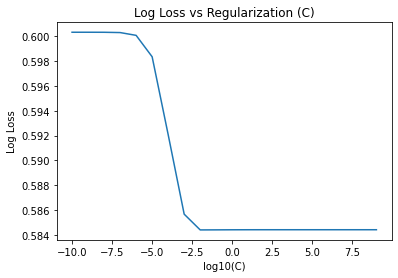

In [13]:
sns.lineplot(x=cs_log10, y=log_losses)
plt.xlabel("log10(C)")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Regularization (C)")
plt.show()


<b>Analysis</b>: Which value of $C$ yields the best results, in terms of loss?

<Double click this Markdown cell to make it editable, and record your findings here.>

#### Plot Accuracy

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting accuracy score for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the accuracy score should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

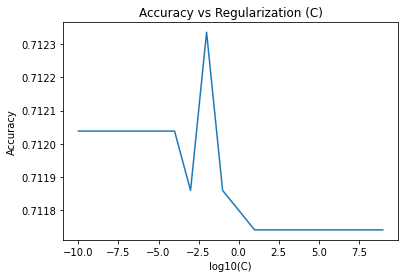

In [14]:
sns.lineplot(x=cs_log10, y=accuracies)
plt.xlabel("log10(C)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Regularization (C)")
plt.show()


<b>Analysis</b>: Which value of $C$ yields the best results, in terms of accuracy?

The best value of C in terms of best accuracy is where the curve is maximized. It is often found at the lowest loss as well, but it can be at a slightly higher C (weaker regularization) as well.